# Telekom kompaniyasidagi mijozlar ketishini tahlil qilish va bashorat qilish
**Tavsif:** Telekom kompaniyasi nima sababdan mijozlar xizmatdan voz kechayotganini aniqlashni istaydi. Sizning vazifangiz — ma’lumotlarni tahlil qilish, mijoz ketishini bashorat qiluvchi model yaratish va oxirida oddiy Telegram-bot yoki veb-sayt ko‘rinishida tizim qurish.
Eslatma: Dastlabki ma’lumotlar xatolar, yetishmayotgan qiymatlar va noodatiy qiymatlarni o‘z ichiga oladi. Ma’lumotlar tozalab, tahlil qilinishi kerak.

## 1. Biznes muammosini tushunish:


**1. Nima uchun kompaniya uchun mijoz ketishini oldindan bilish muhim?**

Telekom kompaniyasi uchun mijozlarning ketishini oldindan bilish — bu strategik ahamiyatga ega. Quyidagi sabablar bunga asos bo‘ladi:
   1. Yangi mijoz jalb qilish — qimmat: Tadqiqotlar shuni ko‘rsatadiki, yangi mijoz topish mavjud mijozni saqlab qolishga qaraganda 5-10 baravar qimmatroq.
    2. Daromad yo‘qotilishi: Mijoz ketganida, kompaniya uning obuna haqi, qo‘shimcha xizmatlar daromadidan mahrum bo‘ladi. Ko‘p mijozlar ketishi yillik daromadga salbiy ta’sir qiladi.
    3. Ma’lumotga asoslangan qarorlar qabul qilish: Churn (mijoz ketishi) modelini yaratish orqali kompaniya muammo ildizlarini aniqlashi va proaktiv choralar ko‘rishi mumkin (masalan, chegirma, xizmat takomillashuvi).
    4. Segmentatsiya va shaxsiy takliflar: Bashorat asosida mijozlarni segmentlab, xavfli segmentlarga individual marketing strategiyasi yo‘naltirish mumkin.


**2. Qaysi turdagi mijozlar "xavfli" toifaga kiradi?**

"Xavfli" toifa — bu ketish ehtimoli yuqori bo‘lgan mijozlar demakdir. Ma’lumot tahlil qilish va real misollar asosida quyidagi turdagi mijozlar xavfli hisoblanadi:
   1. Yangi qo‘shilgan mijozlar
      Tenure (kompaniyada qolgan muddat) qisqa bo‘lganlar.
      Hali kompaniya xizmatlariga to‘liq ishonch hosil qilmaganlar.
      Ularga yaxshi xizmat ko‘rsatilmasa, tezda raqibga o‘tishi mumkin.
    2. Prepaid (oldindan to‘lovli) yoki oylik shartnoma asosida xizmat oluvchilar
       Contract turi Month-to-month bo‘lgan mijozlar eng katta xavfga ega.
       Chunki ular istalgan vaqtda obunani bekor qilishi mumkin.
    3. Yuqori oylik to‘lov qiluvchilar
       MonthlyCharges yuqori bo‘lganlar.
       Ular xizmat sifati narxga mos bo‘lmasa, ko‘proq norozilik bildirishi mumkin.
    4. Internet xizmatlaridan foydalanuvchilar
       Internet xizmatlarining uzluksizligi muhim bo‘lgan foydalanuvchilar xizmatdagi nosozliklarga chidamsiz bo‘lishi mumkin.
       Ayniqsa, Fiber optic texnologiyasidan foydalanuvchilar churn ehtimoli yuqori
    5. Texnik muammolarga duch kelganlar


## 2. Ma’lumotlarni tahlil qilish va gipotezalarni tekshirish:

In [1]:
import pandas as pd
# Ma'lumotlarni yuklash (o'zingizning dataset fayl nomingizni yozing)
df = pd.read_csv('data/data.csv')
df.head()  # Ma'lumotlarning birinchi 5 qatorini ko'rsatish


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape  # Ma'lumotlar to'plamining o'lchamini ko'rsatish

(7043, 21)

In [3]:
# Bo'sh qiymatlarni tekshirish
print("Bo'sh qiymatlar:")
print(df.isnull().sum())

print("\nChurn taqsimoti:")
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)

Bo'sh qiymatlar:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn taqsimoti:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [4]:
df.info()  # Ma'lumotlar haqida umumiy ma'lumot olish

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()  # Sonli ustunlar bo'yicha statistik ma'lumotlarni olish

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
# Gipoteza 1: Yangi mijozlar ko‘proq ketadimi?
tenure_churn = df[df['Churn'] == 'Yes']['tenure']
tenure_no_churn = df[df['Churn'] == 'No']['tenure']

print("\nGipoteza 1: Yangi mijozlar ko‘proq ketadimi?")
print(f"Ketganlar o'rtacha tenure: {tenure_churn.mean():.2f}")
print(f"Qolganlar o'rtacha tenure: {tenure_no_churn.mean():.2f}")

t_stat, p_val = ttest_ind(tenure_churn, tenure_no_churn, equal_var=False)
print(f"T-test natijasi: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")
if p_val < 0.05:
    print("Natija: Gipoteza tasdiqlandi (farq statistik jihatdan muhim).")
else:
    print("Natija: Gipoteza rad qilindi (farq statistik jihatdan muhim emas).")


Gipoteza 1: Yangi mijozlar ko‘proq ketadimi?
Ketganlar o'rtacha tenure: 17.98
Qolganlar o'rtacha tenure: 37.57
T-test natijasi: t-statistic = -34.824, p-value = 0.000
Natija: Gipoteza tasdiqlandi (farq statistik jihatdan muhim).


In [11]:
# Gipoteza 2: Internet xizmatidan foydalanuvchilar ko‘proq ketadimi?
# Internet xizmatidan foydalanish (Yes/No) va churn (Yes/No) o'rtasidagi bog'liqlikni Chi-kvadrat testi bilan tekshirish

print("\nGipoteza 2: Internet xizmatidan foydalanuvchilar ko‘proq ketadimi?")
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])
print("Kontingens jadvali:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test natijasi: chi2 = {chi2:.3f}, p-value = {p:.3f}")

if p < 0.05:
    print("Natija: Gipoteza tasdiqlandi (Internet xizmatidan foydalanish va churn o'rtasida bog'liqlik bor).")
else:
    print("Natija: Gipoteza rad qilindi (bog'liqlik aniqlanmadi).")


Gipoteza 2: Internet xizmatidan foydalanuvchilar ko‘proq ketadimi?
Kontingens jadvali:
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113
Chi-square test natijasi: chi2 = 732.310, p-value = 0.000
Natija: Gipoteza tasdiqlandi (Internet xizmatidan foydalanish va churn o'rtasida bog'liqlik bor).


In [12]:
# Gipoteza 3: Ayollar kamroq ketadimi?
# Jins (gender) va churn o'rtasidagi farqni Chi-kvadrat testi bilan tekshirish

print("\nGipoteza 3: Ayollar kamroq ketadimi?")
contingency_gender = pd.crosstab(df['gender'], df['Churn'])
print("Kontingens jadvali:")
print(contingency_gender)

chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_gender)
print(f"Chi-square test natijasi: chi2 = {chi2_gender:.3f}, p-value = {p_gender:.3f}")

if p_gender < 0.05:
    print("Natija: Gipoteza tasdiqlandi (jins va churn o'rtasida farq bor).")
else:
    print("Natija: Gipoteza rad qilindi (jins va churn o'rtasida farq yo'q).")


Gipoteza 3: Ayollar kamroq ketadimi?
Kontingens jadvali:
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930
Chi-square test natijasi: chi2 = 0.484, p-value = 0.487
Natija: Gipoteza rad qilindi (jins va churn o'rtasida farq yo'q).


## 3. Vizualizatsiya:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


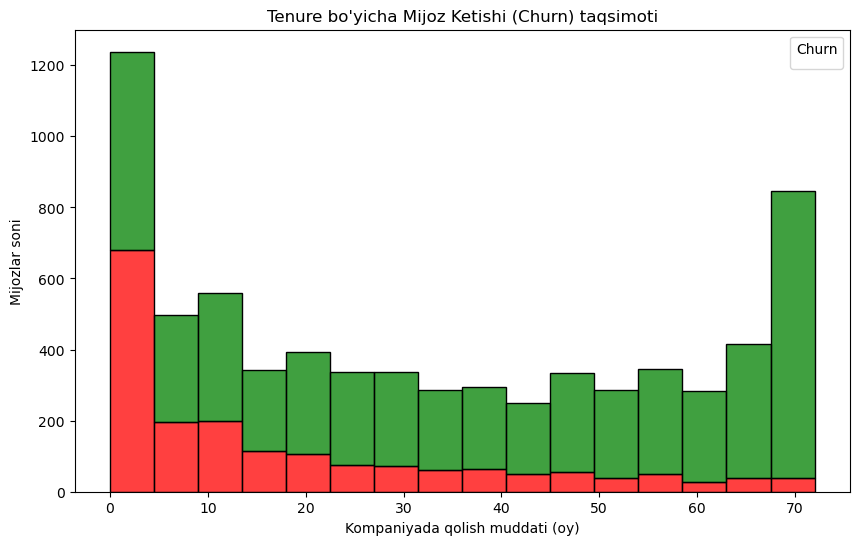

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tozalash: Churn ustuni faqat 'Yes' va 'No' qiymatlaridan iborat bo‘lishi kerak
df_clean = df[df['Churn'].isin(['Yes', 'No'])]

plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x='tenure', hue='Churn', multiple='stack', palette={'Yes':'red', 'No':'green'})
plt.title("Tenure bo'yicha Mijoz Ketishi (Churn) taqsimoti")
plt.xlabel("Kompaniyada qolish muddati (oy)")
plt.ylabel("Mijozlar soni")
plt.legend(title='Churn')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


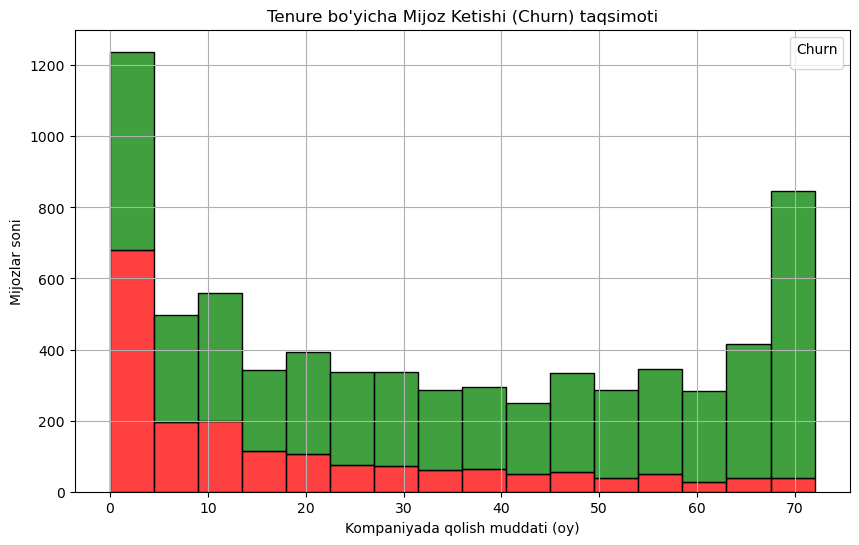

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ma'lumotlarni tozalash (Churn ustunida faqat 'Yes' yoki 'No')
df_clean = df[df['Churn'].isin(['Yes', 'No'])]

# 1-grafik: tenure bo‘yicha Churn
plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x='tenure', hue='Churn', multiple='stack', palette={'Yes':'red', 'No':'green'})
plt.title("Tenure bo'yicha Mijoz Ketishi (Churn) taqsimoti")
plt.xlabel("Kompaniyada qolish muddati (oy)")
plt.ylabel("Mijozlar soni")
plt.legend(title='Churn')
plt.grid(True)
plt.show()


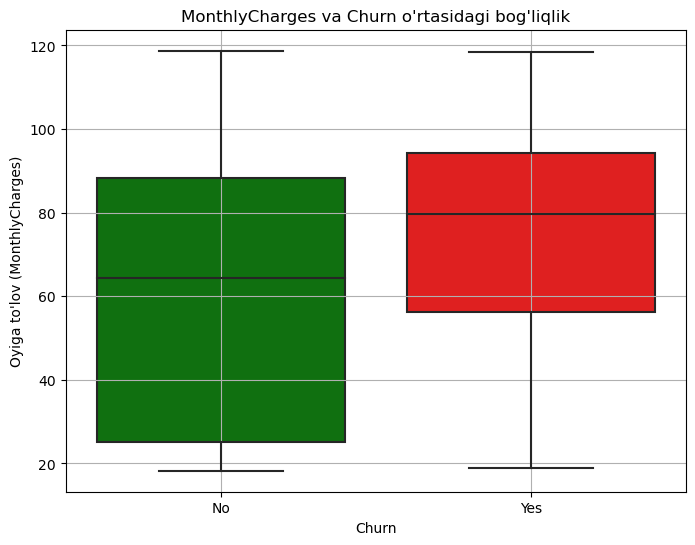

In [15]:
# 2-grafik: MonthlyCharges vs Churn
plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges', palette={'Yes':'red', 'No':'green'})
plt.title("MonthlyCharges va Churn o'rtasidagi bog'liqlik")
plt.xlabel("Churn")
plt.ylabel("Oyiga to'lov (MonthlyCharges)")
plt.grid(True)
plt.show()


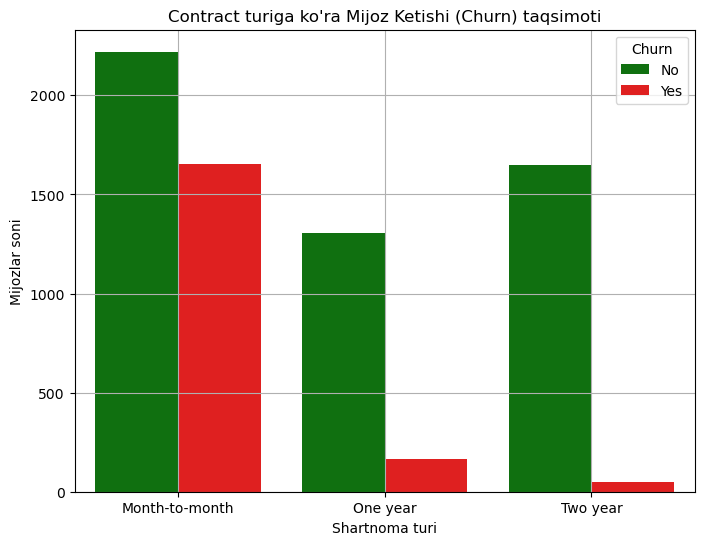

In [16]:
# 3-grafik: Contract vs Churn
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x='Contract', hue='Churn', palette={'Yes':'red', 'No':'green'})
plt.title("Contract turiga ko'ra Mijoz Ketishi (Churn) taqsimoti")
plt.xlabel("Shartnoma turi")
plt.ylabel("Mijozlar soni")
plt.legend(title='Churn')
plt.grid(True)
plt.show()


## 4. Ma’lumotlarni tozalash:

In [19]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),??,NaN,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,NaN,Yes


In [20]:
# NaN qiymatlar sonini ko'rish
print("NaN qiymatlar soni:\n", df.isna().sum())

# NaN qiymatlar bor satrlarni olib tashlash
df_clean = df.dropna()


NaN qiymatlar soni:
 customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure              347
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      347
TotalCharges        345
Churn                 0
dtype: int64


In [21]:
# Har bir ustun bo'yicha '??' yoki 'unknown' qiymatlar borligini tekshirish
for col in df_clean.columns:
    print(f"{col} ustunidagi noto'g'ri qiymatlar soni:", 
          df_clean[col].isin(['??', 'unknown']).sum())

# Barcha noto'g'ri qiymatli satrlarni chiqarib tashlash
df_clean = df_clean[~df_clean.isin(['??', 'unknown']).any(axis=1)]


customerID ustunidagi noto'g'ri qiymatlar soni: 0
gender ustunidagi noto'g'ri qiymatlar soni: 0
SeniorCitizen ustunidagi noto'g'ri qiymatlar soni: 0
Partner ustunidagi noto'g'ri qiymatlar soni: 0
Dependents ustunidagi noto'g'ri qiymatlar soni: 0
tenure ustunidagi noto'g'ri qiymatlar soni: 0
PhoneService ustunidagi noto'g'ri qiymatlar soni: 0
MultipleLines ustunidagi noto'g'ri qiymatlar soni: 0
InternetService ustunidagi noto'g'ri qiymatlar soni: 0
OnlineSecurity ustunidagi noto'g'ri qiymatlar soni: 0
OnlineBackup ustunidagi noto'g'ri qiymatlar soni: 0
DeviceProtection ustunidagi noto'g'ri qiymatlar soni: 0
TechSupport ustunidagi noto'g'ri qiymatlar soni: 0
StreamingTV ustunidagi noto'g'ri qiymatlar soni: 0
StreamingMovies ustunidagi noto'g'ri qiymatlar soni: 0
Contract ustunidagi noto'g'ri qiymatlar soni: 0
PaperlessBilling ustunidagi noto'g'ri qiymatlar soni: 0
PaymentMethod ustunidagi noto'g'ri qiymatlar soni: 0
MonthlyCharges ustunidagi noto'g'ri qiymatlar soni: 122
TotalCharges ust

In [22]:
# TotalCharges ustuni > 10000 yoki tenure < 0 bo'lgan satrlar
df_clean = df_clean[(pd.to_numeric(df_clean['TotalCharges'], errors='coerce') <= 10000) &
                    (df_clean['tenure'] >= 0)]


In [23]:
# TotalCharges ustunini floatga o‘tkazish (ko‘pincha string bo‘ladi)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Yana NaN bo'lganlar chiqsa, ularni olib tashlash
df_clean = df_clean.dropna()

# Tekshirish: ma'lumot turlari
print(df_clean.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges       object
TotalCharges        float64
Churn                object
dtype: object


In [24]:
print("Yakuniy toza DataFrame o'lchami:", df_clean.shape)
print("Yakuniy NaN qiymatlar soni:\n", df_clean.isna().sum())


Yakuniy toza DataFrame o'lchami: (5676, 21)
Yakuniy NaN qiymatlar soni:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 5. Xususiyatlar bilan ishlash:

In [25]:
# Kategorik ustunlar (object yoki bool)
categorical_cols = df_clean.select_dtypes(include=['object', 'bool']).columns.tolist()
print("Kategorik ustunlar:", categorical_cols)


Kategorik ustunlar: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df_clean.copy()

# faqat ikkilik ustunlarga label encoding qo'llash
for col in categorical_cols:
    if df_encoded[col].nunique() == 2:
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [27]:
df_encoded = pd.get_dummies(df_encoded, columns=[col for col in categorical_cols if df_clean[col].nunique() > 2], drop_first=True)


In [28]:
from sklearn.preprocessing import StandardScaler

# Sonli ustunlar (int yoki float)
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Xohlasangiz, 'Churn' ustunini olib tashlang (agar u target bo‘lsa)
if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

# Masshtablash
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


In [30]:
df_encoded.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,TotalCharges,Churn,customerID_0003-MKNFE,...,MonthlyCharges_99.5,MonthlyCharges_99.55,MonthlyCharges_99.6,MonthlyCharges_99.65,MonthlyCharges_99.7,MonthlyCharges_99.75,MonthlyCharges_99.8,MonthlyCharges_99.85,MonthlyCharges_99.9,MonthlyCharges_99.95
1,1,-0.443237,0,0,0.061419,1,0,-0.177518,0,False,...,False,False,False,False,False,False,False,False,False,False
2,1,-0.443237,0,0,-1.247005,1,1,-0.967510,1,False,...,False,False,False,False,False,False,False,False,False,False
4,0,-0.443237,0,0,-1.247005,1,1,-0.948218,1,False,...,False,False,False,False,False,False,False,False,False,False
7,0,-0.443237,0,0,-0.919899,0,0,-0.881586,0,False,...,False,False,False,False,False,False,False,False,False,False
8,0,-0.443237,1,0,-0.183911,1,1,0.335388,1,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Tozalangan, kodlangan va masshtablangan dataframe'ni CSV faylga saqlash
df_encoded.to_csv("data/cleaned_telco_data.csv", index=False)

print("✅ Fayl muvaffaqiyatli 'cleaned_telco_data.csv' nomi bilan saqlandi.")


✅ Fayl muvaffaqiyatli 'cleaned_telco_data.csv' nomi bilan saqlandi.


## 6. Model yaratish:

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_proba = log_model.predict_proba(X_test)[:,1]

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:,1]

# 3. Har bir model uchun metrikalarni hisoblash
log_scores = {
    'accuracy': accuracy_score(y_test, log_preds),
    'f1': f1_score(y_test, log_preds),
    'roc_auc': roc_auc_score(y_test, log_proba)
}

rf_scores = {
    'accuracy': accuracy_score(y_test, rf_preds),
    'f1': f1_score(y_test, rf_preds),
    'roc_auc': roc_auc_score(y_test, rf_proba)
}

In [40]:
# Natijalarni chiroyli ko'rsatish
print("Model baholash natijalari:\n")

print("Logistic Regression:")
for metric, score in log_scores.items():
    print(f"  {metric.capitalize()}: {score:.4f}")

print("\nRandom Forest:")
for metric, score in rf_scores.items():
    print(f"  {metric.capitalize()}: {score:.4f}")

# Eng yaxshi modelni aniqlash (F1 asosida, istasangiz ROC-AUC asosida ham tanlashingiz mumkin)
best_by = 'f1'  # yoki 'roc_auc' yoki 'accuracy'

if rf_scores[best_by] > log_scores[best_by]:
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    best_model = log_model
    best_model_name = "Logistic Regression"

print(f"\n✅ Eng yaxshi model: {best_model_name} ( {best_by.upper()} = {max(rf_scores[best_by], log_scores[best_by]):.4f} )")


Model baholash natijalari:

Logistic Regression:
  Accuracy: 0.7958
  F1: 0.5639
  Roc_auc: 0.8451

Random Forest:
  Accuracy: 0.7940
  F1: 0.5105
  Roc_auc: 0.8467

✅ Eng yaxshi model: Logistic Regression ( F1 = 0.5639 )


In [39]:
import joblib

# Eng yuqori F1 score asosida model tanlash (yoki roc_auc/accuracy asosida tanlashingiz mumkin)
if rf_scores['f1'] > log_scores['f1']:
    best_model = rf_model
    print("Random Forest eng yaxshi model sifatida tanlandi.")
else:
    best_model = log_model
    print("Logistic Regression eng yaxshi model sifatida tanlandi.")

# Modelni saqlash
import os
os.makedirs("models", exist_ok=True)
model_path = "models/best_churn_model.pkl"
joblib.dump(best_model, model_path)

print(f"Model saqlandi: {model_path}")


Logistic Regression eng yaxshi model sifatida tanlandi.
Model saqlandi: models/best_churn_model.pkl


## 7. Natijalarni tahlil qilish

In [42]:
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(10))


tenure                            0.082426
TotalCharges                      0.078735
InternetService_Fiber optic       0.027083
PaymentMethod_Electronic check    0.021987
OnlineSecurity_Yes                0.019495
Contract_Two year                 0.019237
TechSupport_Yes                   0.018823
Contract_One year                 0.016921
PaperlessBilling                  0.014669
Partner                           0.012633
dtype: float64


In [47]:
# 3. Gipoteza: Contract turi va churn o'rtasidagi bog'liqlik
contract_churn_ct = pd.crosstab(df['Contract'], df['Churn'])

# Chi-kvadrat testi bilan bog'liqlikni tekshirish
chi2, p, dof, ex = chi2_contingency(contract_churn_ct)
print("Contract va Churn uchun Chi-kvadrat testi natijasi:")
print(f"Chi2={chi2}, p-value={p}")

Contract va Churn uchun Chi-kvadrat testi natijasi:
Chi2=1184.5965720837926, p-value=5.863038300673391e-258
